<a href="https://colab.research.google.com/github/Sandwhaletree/Mai_Finlab/blob/main/A_%E7%94%9F%E6%B4%BB%E6%87%89%E7%94%A8/B1_%E9%A3%9B%E6%A7%B3_pdf%E8%BD%89excel_230919.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🔥🔥🔥**從 PDF 提取 Excel 文件**
* 參考網站
  * [Github 標星 13-6k ！一行代碼從 PDF 提取 Excel 文件，牛逼炸了！](https://www.readfog.com/a/1643639504411660288)
* google安裝路徑  
user>local>lib>python3.8>dis-packages>paddleocr;paddle:layoutparser
* google字體路徑  
/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf

In [ ]:
#指定google雲端路徑，方便儲存與下載檔案
import os
os.chdir('/content/drive/MyDrive/colab_cloud/pdf/ppocr/ppocr_img')

In [ ]:
#1.先安裝PaddlePaddle
!python3 -m pip install paddlepaddle -i https://mirror.baidu.com/pypi/simple

Looking in indexes: https://mirror.baidu.com/pypi/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 121.6 MB 43 kB/s 
     |████████████████████████████████| 385 kB 14.8 MB/s 


In [ ]:
#2.安装 Layout-Parser
!pip3 install -U https://paddleocr.bj.bcebos.com/whl/layoutparser-0.0.0-py3-none-any.whl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.1 MB 460 kB/s 
     |████████████████████████████████| 42 kB 959 kB/s 
  Created wheel for iopath: filename=iopath-0.1.10-py3-none-any.whl size=31547 sha256=4a585232f2b3e04b5e85db500f0a5aba2d4dd7e95043e6858356e83c07baa7a2
  Stored in directory: /root/.cache/pip/wheels/89/3e/24/0f349c0b2eeb6965903035f3b00dbb5c9bea437b4a2f18d82c
Successfully built iopath


In [ ]:
#安装PaddleOCR（包含PP-OCR和PP-Structure）
!pip install "paddleocr>=2.0.1"
#（1) PIP快速安装PaddleOCR whl包（仅预测）
#pip install "paddleocr>=2.2" # 推荐使用2.2+版本
#（2) 完整克隆PaddleOCR源码（预测+训练）
#【推荐】git clone https://github.com/PaddlePaddle/PaddleOCR

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 440 kB 29.8 MB/s 
     |████████████████████████████████| 965 kB 37.9 MB/s 
     |████████████████████████████████| 2.2 MB 52.6 MB/s 
     |████████████████████████████████| 619 kB 79.0 MB/s 
     |████████████████████████████████| 8.8 MB 67.8 MB/s 
     |████████████████████████████████| 88 kB 8.5 MB/s 
     |████████████████████████████████| 148 kB 61.4 MB/s 
     |████████████████████████████████| 5.6 MB 21.2 MB/s 
     |████████████████████████████████| 4.9 MB 53.2 MB/s 
     |████████████████████████████████| 399 kB 69.0 MB/s 
     |████████████████████████████████| 204 kB 76.2 MB/s 
     |████████████████████████████████| 132 kB 55.3 MB/s 
     |████████████████████████████████| 2.3 MB 54.4 MB/s 
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116949 sha256=4855bbe82f0bf861d22d917c259d37b4dff0636db6b997da434356506ee81ac

In [ ]:
#安裝pdf轉圖庫
!pip install PyMuPDF

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from paddleocr import PaddleOCR,draw_ocr
from matplotlib import pyplot as plt
import datetime
import cv2 #opencv
import os
import fitz  # fitz就是pip install PyMuPDF
import shutil
from paddleocr import PPStructure,draw_structure_result,save_structure_res

### 👉 **英文圖片解析**
* [Python-文字識別模型-PaddleOCR](https://ithelp.ithome.com.tw/articles/10275518)

In [ ]:
# Setup model-蓋模型
ocr_model = PaddleOCR(lang='en',use_gpu=False)
#lang 中文'ch'、繁體中文'chiness_cht'

download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_det_infer.tar to /root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer/en_PP-OCRv3_det_infer.tar


100%|██████████| 4.00M/4.00M [00:03<00:00, 1.30MiB/s]


download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_rec_infer.tar to /root/.paddleocr/whl/rec/en/en_PP-OCRv3_rec_infer/en_PP-OCRv3_rec_infer.tar


100%|██████████| 9.96M/9.96M [00:24<00:00, 404kiB/s] 


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 2.19M/2.19M [00:06<00:00, 314kiB/s]

[2022/12/23 08:54:51] ppocr DEBUG: Namespace(alpha=1.0, benchmark=False, beta=1.0, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='/root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, crop_res_save_dir='./output', det=True, det_algorithm='DB', det_box_type='quad', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_score_thresh=0.5, draw_img_save_dir='./inference_results', drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_model_dir=None, e2e_pgnet_mode='fast', e2e_pgnet_score_thresh=0.5, e2e_pgnet_valid_set

#### **1.英文發票**
> 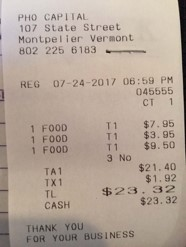

In [ ]:
#圖片分析
img_path = ('./imgs_en/254.jpg')
# Run the ocr method on the ocr model
result = ocr_model.ocr(img_path)

[2022/12/23 08:55:53] ppocr WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
[2022/12/23 08:55:54] ppocr DEBUG: dt_boxes num : 28, elapse : 0.6346464157104492
[2022/12/23 08:55:57] ppocr DEBUG: rec_res num  : 28, elapse : 3.331448793411255


In [ ]:
#回傳的資料為文字的位置，文字內容，與準確度
result

[[[[[67.0, 51.0], [327.0, 46.0], [327.0, 74.0], [68.0, 80.0]],
   ('PHOCAPITAL', 0.9944713711738586)],
  [[[72.0, 92.0], [453.0, 84.0], [454.0, 114.0], [73.0, 122.0]],
   ('107 State Street', 0.9744491577148438)],
  [[[69.0, 135.0], [501.0, 125.0], [501.0, 156.0], [70.0, 165.0]],
   ('Montpelier Vermont', 0.9357032775878906)],
  [[[71.0, 176.0], [364.0, 171.0], [364.0, 201.0], [72.0, 206.0]],
   ('802 225 6183', 0.9168062806129456)],
  [[[74.0, 302.0], [150.0, 299.0], [151.0, 333.0], [75.0, 336.0]],
   ('REG', 0.9945921897888184)],
  [[[198.0, 300.0], [651.0, 285.0], [652.0, 315.0], [199.0, 330.0]],
   ('07-24-2017 06:59 PM', 0.9437680244445801)],
  [[[510.0, 331.0], [651.0, 325.0], [653.0, 357.0], [511.0, 362.0]],
   ('045555', 0.9959447979927063)],
  [[[537.0, 370.0], [588.0, 370.0], [588.0, 402.0], [537.0, 402.0]],
   ('CT', 0.9880505800247192)],
  [[[397.0, 457.0], [442.0, 457.0], [442.0, 491.0], [397.0, 491.0]],
   ('T1', 0.9933971166610718)],
  [[[539.0, 452.0], [655.0, 447.0], [

In [ ]:
#單獨把文字列出來
for res in result:
  for i in res:
    value = i
    # print(f'value:',value)
    string = value[1]
    # print(f'string:',string)
    word = string[0]
    print(word)

PHOCAPITAL
107 State Street
Montpelier Vermont
802 225 6183
REG
07-24-2017 06:59 PM
045555
CT
T1
$7.95
1 F00D
T1
$3.95
1F00D
T1
$9.50
1F00D
3 No
$21.40
TA1
$1.92
TX1
TL
$23.32
$23.32
CASH
THANK YOU
FOR YOUR BUSINESS


### 👉 **PP-Structure處理複雜文檔結構**
* [Github-PP-Structure中文說明](https://github.com/PaddlePaddle/PaddleOCR/blob/release/2.2/ppstructure/README_ch.md)
* 支持对图片形式的文档进行版面分析，可以划分文字、标题、表格、图片以及列表5类区域（与Layout-Parser联合使用）
* 支持文字、标题、图片以及列表区域提取为文字字段（与PP-OCR联合使用）
* 支持表格区域进行结构化分析，最终结果输出Excel文件
* 辨識成果:下方為1.png圖片辨識後，將內容標籤
> 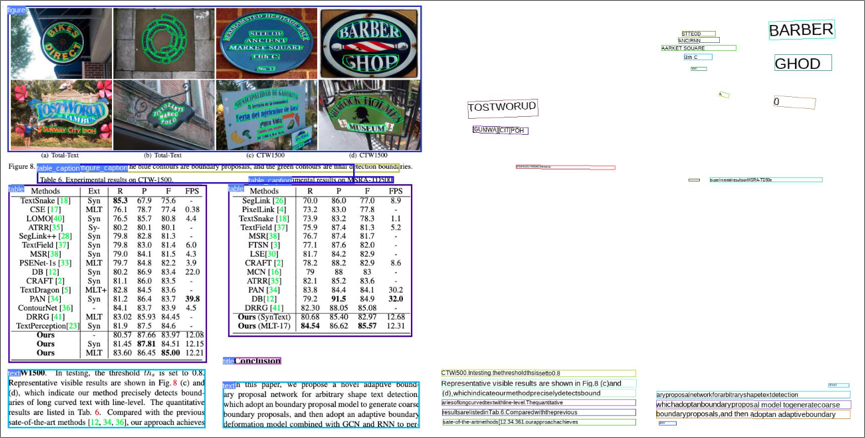

In [ ]:
import os
os.chdir('/content/drive/MyDrive/colab_cloud/pdf/ppocr/ppocr_img')

In [ ]:
#命令行使用（默认参数，极简）
os.system('paddleocr --image_dir=ppstructure/docs/table/1.png --type=structure')
#paddleocr --image_dir=../doc/table/1.png --type=structure'
#paddleocr --image_dir=ppstructure/docs/table/1.png --type=structure #2.1.2 版面分析+表格识别
#paddleocr --image_dir=ppstructure/docs/table/1.png --type=structure --image_orientation=true #2.1.1 图像方向分类+版面分析+表格识别

256

In [ ]:
#2.2.2 版面分析+表格识别
import os
import cv2
from paddleocr import PPStructure,draw_structure_result,save_structure_res

In [ ]:
table_engine = PPStructure(show_log=True) #用PPStructure這個函式去辨識一張圖片

save_folder = './table/output'         #創建新文件夾output
img_path = './table/1.png' #圖片的路徑
img = cv2.imread(img_path) #
result = table_engine(img)
save_structure_res(result, save_folder,os.path.basename(img_path).split('.')[0]) #結果保存至output>1  #將結果儲存到對應的資料夾中 #第3個參數name，檔案名稱為1
print('已完成下載!!')

[2022/12/23 09:55:27] ppocr DEBUG: Namespace(alpha=1.0, benchmark=False, beta=1.0, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir=None, cls_thresh=0.9, cpu_threads=10, crop_res_save_dir='./output', det=True, det_algorithm='DB', det_box_type='quad', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='/root/.paddleocr/whl/det/ch/ch_PP-OCRv3_det_infer', det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_score_thresh=0.5, draw_img_save_dir='./inference_results', drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_model_dir=None, e2e_pgnet_mode='fast', e2e_pgnet_score_thresh=0.5, e2e_pgnet_valid_set='totaltext', enable_mkldnn=False, fourier_degree=5, 

In [ ]:
for line in result:
    line.pop('img') #將辨識出來的result中，img欄位刪除
    print(line) #印出剩下結果

#type: 图片区域的类型
#bbox: 图片区域的在原图的坐标，分别[左上角x，左上角y，右下角x，右下角y]
#res: 图片区域的OCR或表格识别结果。

{'type': 'text', 'bbox': [11, 729, 407, 847], 'res': [{'text': 'CTWi500.Intesting.thethresholdthsissetto0.8', 'confidence': 0.9045917391777039, 'text_region': [[13.0, 730.0], [403.0, 731.0], [403.0, 744.0], [13.0, 743.0]]}, {'text': 'Representative visible results are shown in Fig.8 (c)and', 'confidence': 0.9068712592124939, 'text_region': [[13.0, 749.0], [404.0, 749.0], [404.0, 765.0], [13.0, 765.0]]}, {'text': '(d),whichindicateourmethodpreciselydetectsbound', 'confidence': 0.9489828944206238, 'text_region': [[15.0, 769.0], [403.0, 769.0], [403.0, 784.0], [15.0, 784.0]]}, {'text': 'ariesoflongcurvedtextwithline-level.Thequantitative', 'confidence': 0.9416295886039734, 'text_region': [[14.0, 790.0], [403.0, 790.0], [403.0, 802.0], [14.0, 802.0]]}, {'text': 'resultsarelistedinTab.6.Comparedwiththeprevious', 'confidence': 0.9393002986907959, 'text_region': [[15.0, 809.0], [403.0, 809.0], [403.0, 822.0], [15.0, 822.0]]}, {'text': 'sate-of-the-artmethods[12.34.361.ourapproachachieves', 'c

In [ ]:
from PIL import Image

font_path = '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf' # PaddleOCR下提供字体包
image = Image.open(img_path).convert('RGB')
im_show = draw_structure_result(image, result,font_path=font_path)
im_show = Image.fromarray(im_show)
im_show.save('./table/result.jpg') #儲存路徑
print('完成檔案result.jpg')

* 實驗其他文件輸出

In [ ]:
#實驗2
table_engine = PPStructure(show_log=True) #用PPStructure這個函式去辨識一張圖片

save_folder = './table/output'         #創建新文件夾output
img_path = './table/finance1.jpg'       #圖片的路徑
img = cv2.imread(img_path) #
result = table_engine(img)
save_structure_res(result, save_folder,os.path.basename(img_path).split('.')[0]) #結果保存至output>1  #將結果儲存到對應的資料夾中 #第3個參數name，檔案名稱為1
print('已完成下載!!')

[2022/12/23 10:51:07] ppocr DEBUG: Namespace(alpha=1.0, benchmark=False, beta=1.0, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir=None, cls_thresh=0.9, cpu_threads=10, crop_res_save_dir='./output', det=True, det_algorithm='DB', det_box_type='quad', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='/root/.paddleocr/whl/det/ch/ch_PP-OCRv3_det_infer', det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_score_thresh=0.5, draw_img_save_dir='./inference_results', drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_model_dir=None, e2e_pgnet_mode='fast', e2e_pgnet_score_thresh=0.5, e2e_pgnet_valid_set='totaltext', enable_mkldnn=False, fourier_degree=5, 

In [ ]:
for line in result:
    line.pop('img') #將辨識出來的result中，img欄位刪除
    print(line) #印出剩下結果

#type: 图片区域的类型
#bbox: 图片区域的在原图的坐标，分别[左上角x，左上角y，右下角x，右下角y]
#res: 图片区域的OCR或表格识别结果。

{'type': 'figure', 'bbox': [14, 0, 1705, 933], 'res': [{'text': '電子资料查购作票', 'confidence': 0.7675373554229736, 'text_region': [[16.0, 22.0], [134.0, 22.0], [134.0, 39.0], [16.0, 39.0]]}, {'text': '2020_2317_20210623FE4202:X', 'confidence': 0.8933095932006836, 'text_region': [[247.0, 22.0], [477.0, 22.0], [477.0, 39.0], [247.0, 39.0]]}, {'text': '?2020.2317_20210623F042022×公司年粮1鸿海科技集田', 'confidence': 0.8295084834098816, 'text_region': [[484.0, 24.0], [893.0, 24.0], [893.0, 41.0], [484.0, 41.0]]}, {'text': '×2020公司年载_1622795812pdf×+', 'confidence': 0.871565043926239, 'text_region': [[928.0, 22.0], [1224.0, 22.0], [1224.0, 45.0], [928.0, 45.0]]}, {'text': '包', 'confidence': 0.630207359790802, 'text_region': [[1592.0, 26.0], [1608.0, 26.0], [1608.0, 39.0], [1592.0, 39.0]]}, {'text': 'n.tw/pdf/2020_2317_20210623FE4.20220421_093231.pdf', 'confidence': 0.9093557596206665, 'text_region': [[14.0, 55.0], [393.0, 53.0], [393.0, 75.0], [14.0, 77.0]]}, {'text': '#国', 'confidence': 0.0978094190359115

In [ ]:
from PIL import Image

font_path = '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf' # PaddleOCR下提供字体包
image = Image.open(img_path).convert('RGB')
im_show = draw_structure_result(image, result,font_path=font_path)
im_show = Image.fromarray(im_show)
im_show.save('./table/result.jpg') #儲存路徑
print('完成檔案result.jpg')

完成檔案result.jpg


## **PDF批量转图片**

In [ ]:
#3.1 定义转换函数
imagePath = './pdf/pdf_image'
pdfPath = './pdf/money.pdf'

In [ ]:
startTime_pdf2img = datetime.datetime.now()  # 开始时间

In [ ]:
print("imagePath=" + imagePath)

imagePath=./pdf/pdf_image


In [ ]:
pdfDoc = fitz.open(pdfPath)

In [ ]:
print(pdfDoc)

Document('./pdf/money.pdf')


In [ ]:
print("imagePath=" + imagePath)
pdfDoc = fitz.open(pdfPath)
for pg in range(pdfDoc.pageCount):
    page = pdfDoc[pg]
    rotate = int(0)
    # 每个尺寸的缩放系数为4，这将为我们生成分辨率提高4的图像。
    # 此处若是不做设置，默认图片大小为：792X612, dpi=96
    zoom_x = 4  # (1.33333333-->1056x816)   (2-->1584x1224)
    zoom_y = 4
    mat = fitz.Matrix(zoom_x, zoom_y).preRotate(rotate)
    pix = page.getPixmap(matrix=mat, alpha=False)

    if not os.path.exists(imagePath):  # 判断存放图片的文件夹是否存在
        os.makedirs(imagePath)  # 若图片文件夹不存在就创建

    pix.writePNG(imagePath + '/' + 'images_%s.png' % pg)  # 将图片写入指定的文件夹内
    endTime_pdf2img = datetime.datetime.now()  # 结束时间
    print('pdf转图片时间=', (endTime_pdf2img - startTime_pdf2img).seconds)

imagePath=./pdf/pdf_image


AttributeError: ignored

## **表單識別**
* [飛槳-金融表單視頻](https://pan.baidu.com/play/video#/video?path=%2F%E6%88%91%E7%9A%84%E8%B5%84%E6%BA%90%2FPaddleOCR%E5%BC%80%E6%BA%90%E5%A4%A7%E7%A4%BC%E5%8C%85%2FOCR%E5%9C%BA%E6%99%AF%E5%BA%94%E7%94%A8%E8%8C%83%E4%BE%8B%E5%BA%93%2F%E9%87%91%E8%9E%8D%E8%A1%A8%E5%8D%95%E8%AF%86%E5%88%AB%E4%B8%8E%E4%BF%A1%E6%81%AF%E6%8A%BD%E5%8F%96.mp4&t=-1)
* [飛槳-表單識別](https://aistudio.baidu.com/bd-cpu-01/user/3202430/5312755/lab)
* [飛槳-全部實踐範例](https://aistudio.baidu.com/aistudio/topic/1000)

In [ ]:
%cd /home/aistudio/PaddleOCR

[Errno 2] No such file or directory: '/home/aistudio/PaddleOCR'
/content


In [ ]:
!pip install -U pip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.1 MB 23.3 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3


In [ ]:
!pip install -r requirements.txt

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


In [ ]:
!pip install yacs gnureadline paddlenlp==2.2.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 633.5/633.5 kB 44.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 52.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16179 sha256=53aa35548867a7b20a594cbcfd34a7c64dbe036cbbfb6d953f9b705687e1329d
  Stored in directory: /root/.cache/pip/wheels/e3/30/9b/6b670dac34775f2b7cc4e9b172202e81fbb4f9cdb103c1ca66
Successfully built seqeval


In [ ]:
!pip install xlsxwriter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 11.8 MB/s eta 0:00:00
